In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv('data/nwac_mount_hood_dec2013-dec2017.csv', index_col='Unnamed: 0')

In [53]:
df.index = df.index.map(lambda x: pd.to_datetime(x, utc='America/Los_Angeles'))
df.index = df.index.tz_convert('America/Los_Angeles')
df.sort_index(inplace=True)
df.head()

,treeline-above,treeline-below,discussion,sizes,octagons,treeline-near,likelihoods,problems
2013-12-10 14:36:00-08:00,Moderate,Low,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/88.png'],Moderate,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['wind-slab']
2013-12-10 14:42:00-08:00,Moderate,Low,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/89.png'],Moderate,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['wind-slab']
2013-12-10 21:24:00-08:00,Moderate,Low,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/90.png'],Moderate,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['wind-slab']
2013-12-11 15:26:00-08:00,High,Moderate,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['/avalanche-forecast/octagon/problem/93.png',...",Considerable,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['wind-slab', 'storm-slabs']"
2013-12-12 19:07:00-08:00,Considerable,Moderate,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/131.png'...,Moderate,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['wind-slab', 'storm-slabs']"


In [54]:
df.rename(columns={'treeline-above': 'above', 'treeline-near': 'near', 'treeline-below': 'below'}, inplace=True)

In [55]:
# df.drop('discussion', axis=1, inplace=True)  # big html field; not going to deal with this now
df.below.unique()

array(['Low', 'Moderate', 'Considerable', 'High', 'No Rating', 'Extreme'], dtype=object)

In [56]:
df[df.below=='No Rating'] # looks pretty safe

,above,below,discussion,sizes,octagons,near,likelihoods,problems
2016-04-21 15:57:00-07:00,Moderate,No Rating,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/5230.png...,Low,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['cornices', 'loose-wet']"


In [57]:
danger_dict = {'Moderate': 2, 'High': 4, 'Considerable': 3, 'Low': 1, 'Extreme': 5, 'No Rating': 1}
for col in ['above', 'near', 'below']:
    df[col] = df[col].apply(lambda x: danger_dict[x])

In [58]:
df.describe()

,above,below,near
count,666.000000,666.000000,666.000000
mean,2.579580,1.956456,2.376877
std,0.770004,0.790676,0.793208
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000
50%,3.000000,2.000000,2.000000
75%,3.000000,2.000000,3.000000
max,5.000000,5.000000,5.000000


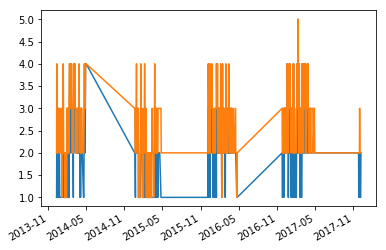

In [59]:
df.below.plot()
df.above.plot()
# hey it worked!

In [60]:
import numpy as np
np.median(df.index.hour)  # at 6:00pm is it the forecast for tomorrow; what about midnight? or 6am?

18.0

In [61]:
# assign forecasts to correct day
import datetime

morning_forecasts = df[df.index.hour <= 12]

def same_day_forecast(sample, forecasts):
    # print(forecasts.index[sample].date())
    d_o_w = 'orecast for {}'.format(forecasts.index[sample].weekday_name)
    disc = forecasts.discussion[sample]
    if d_o_w in disc:
        # return 1
        return forecasts.index[sample].date()
    else:
        # return 0
        return forecasts.index[sample].date() + datetime.timedelta(days=1)

# total = 0
# for i in range(len(morning_forecasts)):
# total += same_day_forecast(i, morning_forecasts)
    
# print(total, len(morning_forecasts))

# s[0]: regular forecast for Tuesday (weird)
# s[1]: UPDATE for weather change at 10:57 am 2013-12-21
# s[2]: same day
# s[3]: same day

In [62]:
df['forecast_for_date'] = [same_day_forecast(x, df) for x in range(666)]

In [63]:
# df.problems.unique()  
# ['storm-slabs', 'wet-slabs', 'persistent-slab', 'wind-slab', 'loose-wet', 'persistent-deep-slab', 'glide', 'cornices', 'loose-dry']
problems = ['storm-slabs', 'wet-slabs', 'persistent', 'wind-slab', 'loose-wet', 'glide', 'cornices', 'loose-dry']

for problem in problems:
    df[problem.replace('-', '_')] = df.problems.apply(lambda s: problem in s).astype('int')

df.head()

,above,below,discussion,sizes,octagons,near,likelihoods,problems,forecast_for_date,storm_slabs,wet_slabs,persistent,wind_slab,loose_wet,glide,cornices,loose_dry
2013-12-10 14:36:00-08:00,2,1,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/88.png'],2,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['wind-slab'],2013-12-11,0,0,0,1,0,0,0,0
2013-12-10 14:42:00-08:00,2,1,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/89.png'],2,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['wind-slab'],2013-12-11,0,0,0,1,0,0,0,0
2013-12-10 21:24:00-08:00,2,1,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/90.png'],2,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['wind-slab'],2013-12-11,0,0,0,1,0,0,0,0
2013-12-11 15:26:00-08:00,4,2,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['/avalanche-forecast/octagon/problem/93.png',...",3,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['wind-slab', 'storm-slabs']",2013-12-12,1,0,0,1,0,0,0,0
2013-12-12 19:07:00-08:00,3,2,"['\n ', <div class=""forecast-snowpa...",['https://d22fgw9k2fjwhz.cloudfront.net/media/...,['/avalanche-forecast/octagon/problem/131.png'...,2,['https://d22fgw9k2fjwhz.cloudfront.net/media/...,"['wind-slab', 'storm-slabs']",2013-12-13,1,0,0,1,0,0,0,0


In [64]:
# for example: mask for persistent slabs
pslab = df.persistent == 1

In [67]:
count = 0
for row in df.index:
    count += 1
    
print(count)

666


In [74]:
l = len(df)
drops = 0

df.assign(is_duplicate = False)

for i in range(0, l - 1):
    if df.forecast_for_date[i] == df.forecast_for_date[i+1]:
        print(df.index[i], 'superceded by', df.index[i + 1])
        df['is_duplicate'][i] = True
        drops += 1

print('dropped {} rows'.format(drops))

2013-12-10 14:36:00-08:00 superceded by 2013-12-10 14:42:00-08:00
2013-12-10 14:42:00-08:00 superceded by 2013-12-10 21:24:00-08:00
2013-12-13 17:17:00-08:00 superceded by 2013-12-13 18:00:00-08:00
2013-12-16 04:22:00-08:00 superceded by 2013-12-16 15:47:00-08:00
2013-12-20 18:27:00-08:00 superceded by 2013-12-20 18:31:00-08:00
2013-12-20 18:31:00-08:00 superceded by 2013-12-21 10:57:00-08:00


/home/sam/.envs/avalanche/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


2014-01-09 18:00:00-08:00 superceded by 2014-01-10 08:54:00-08:00
2014-01-10 18:00:00-08:00 superceded by 2014-01-11 09:17:00-08:00
2014-01-12 18:13:00-08:00 superceded by 2014-01-12 18:22:00-08:00
2014-02-01 20:44:00-08:00 superceded by 2014-02-02 08:49:00-08:00
2014-02-07 09:05:00-08:00 superceded by 2014-02-07 18:25:00-08:00
2014-02-10 18:00:00-08:00 superceded by 2014-02-11 03:21:00-08:00
2014-02-16 12:12:00-08:00 superceded by 2014-02-16 18:00:00-08:00
2014-03-01 18:00:00-08:00 superceded by 2014-03-02 12:37:00-08:00
2014-03-02 12:37:00-08:00 superceded by 2014-03-02 12:50:00-08:00
2014-03-02 18:11:00-08:00 superceded by 2014-03-03 06:16:00-08:00
2014-03-06 18:00:00-08:00 superceded by 2014-03-06 19:06:00-08:00
2014-03-08 18:00:00-08:00 superceded by 2014-03-09 07:07:00-07:00
2014-03-09 18:00:00-07:00 superceded by 2014-03-09 20:51:00-07:00
2014-03-22 18:00:00-07:00 superceded by 2014-03-23 06:45:00-07:00
2014-03-25 10:19:00-07:00 superceded by 2014-03-25 18:00:00-07:00
2014-03-27

In [95]:
mask = df.is_duplicate == False

In [96]:
i = 0
print(df[mask].index[i])
print(df[mask].index[i].weekday_name)
print(df[mask].forecast_for_date[i])
df[mask].discussion[i]

2013-12-10 21:24:00-08:00
Tuesday
2013-12-11


'[\'\\n            \', <div class="forecast-snowpack" id="slider1-title" style="display: none">\n                <h3>Recent images from NWAC:</h3>\n            </div>, \'\\n            \', \' Jssor Slider Begin \', \'\\n            \', \' You can move inline styles to css file or css block. \', \'\\n            \', <div id="slider1_container" style="position: relative; top: 0px; left: 0px; width: 809px; height: 150px; overflow: hidden; display: none;">\n                <!-- Loading Screen -->\n                <div style="position: absolute; top: 0px; left: 0px;" u="loading">\n                    <div style="filter: alpha(opacity=70); opacity:0.7; position: absolute; display: block;\n                        background-color: #000; top: 0px; left: 0px; width: 100%;height:100%;">\n                    </div>\n                    <div style="position: absolute; display: block; background: url(../../../static/images/loading.gif) no-repeat center center;\n                        top: 0px; lef

In [97]:
df[mask].to_csv('forecasts_no_dups.csv')